## House_Price_Prediction_Advance_Regression_Model
Projects is divided into below sections:

- Data understanding
- Data Cleaning
- Data Preperation
- Model Building
- Model Evaluation and Residual Analysis



### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The 
company wants to know 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether 
  to invest in them or not.
* Determine the optimal value of lambda for ridge and lasso regression.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

### Step 1: Data Understanding

#### Import Require Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#import warning to ignore uncessary warnings
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset of House Price Prediction

In [2]:
df = pd.read_csv("train.csv")
df.head()             # to check first 5rows of dataset and get broader view

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Use Sample method to check 5 random rows from dataset to get much better and clear understanding 
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
897  898          90       RL         64.0     7018   Pave   NaN      Reg   
805  806          20       RL         91.0    12274   Pave   NaN      IR1   
735  736          75       RM         60.0    10800   Pave   NaN      Reg   
699  700         120       FV         59.0     4282   Pave  Pave      IR2   
875  876          60       FV         75.0     9000   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
897         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
805         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
735         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
699         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
875         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
897      6   2009        WD         Alloca     142953  
805      7   2008       New        Partial     227680  
735     10   2006        WD         Normal     163000  
699      7   2008        WD         Normal     196000  
875      8   2007       New        Partial     303477  

[5 rows x 81 columns]

In [4]:
# Use Info method to get basic info of data set like ,column name, datatype and null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Use describe method to check min, max value present in numerical columns of dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
#Use shape method to get the dimension(row,column number) of dataset
print('shape of dataset is :',df.shape)

shape of dataset is : (1460, 81)


### Step 2: Data Cleaning

In [7]:
#drop duplicate rows if there is any present into dataset
df = df.drop_duplicates()
print('shape of dataset after removal of duplicate rows is :',df.shape)

shape of dataset after removal of duplicate rows is : (1460, 81)


In [8]:
# Drop duplicate column on basis of same column name from dataset
df = df.loc[:,~df.columns.duplicated()].copy()
print('shape of dataset after removal of duplicate column on bais of same column name is :',df.shape)

shape of dataset after removal of duplicate column on bais of same column name is : (1460, 81)


In [9]:
~df.columns.duplicated()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

#### Identify null values and remove or impute the null values present in dataset as necessary

In [10]:
# Checking for null values present in all columns in their percentage form
null_val_col = round(df.isnull().sum()/df.shape[0]*100)
null_val_col = null_val_col[null_val_col>0]
null_val_col.sort_values(ascending = False)

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
MasVnrType       60.0
FireplaceQu      47.0
LotFrontage      18.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
BsmtCond          3.0
BsmtQual          3.0
MasVnrArea        1.0
dtype: float64

In [11]:
# Drop the columns which have more than 40% missing data
df1 = df[df.columns[df.isnull().mean() < 0.4]]
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 75 columns]

In [12]:
# Again Checking for null values present in all columns in their percentage form
null_val_col = round(df1.isnull().sum()/df1.shape[0]*100)
null_val_col = null_val_col[null_val_col>0]
null_val_col.sort_values(ascending = False)

LotFrontage     18.0
GarageType       6.0
GarageYrBlt      6.0
GarageFinish     6.0
GarageQual       6.0
GarageCond       6.0
BsmtQual         3.0
BsmtCond         3.0
BsmtExposure     3.0
BsmtFinType1     3.0
BsmtFinType2     3.0
MasVnrArea       1.0
dtype: float64

In [13]:
# Checking for null values present in categorical columns in their percentage form for better understading and imputation
null_val_cat_col = round(df1.select_dtypes(include='object').isnull().sum()/df1.shape[0]*100)
null_val_cat_col = null_val_cat_col[null_val_cat_col>0]
null_val_cat_col.sort_values(ascending = False)

GarageType      6.0
GarageFinish    6.0
GarageQual      6.0
GarageCond      6.0
BsmtQual        3.0
BsmtCond        3.0
BsmtExposure    3.0
BsmtFinType1    3.0
BsmtFinType2    3.0
dtype: float64

In [14]:
#Replace Missing values present in Categorical coulmns to the Mode value of column
null_cate_col = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']
df1[null_cate_col]=df1[null_cate_col].fillna('None')

In [15]:
# Checking again for null values present in categorical columns in their percentage form after imputation
null_val_cat_col = round(df1.select_dtypes(include='object').isnull().sum()/df1.shape[0]*100)
null_val_cat_col = null_val_cat_col[null_val_cat_col>0]
null_val_cat_col.sort_values(ascending = False)

Series([], dtype: float64)

In [16]:
# Checking for null values present in numerical columns in their percentage form for better understading and imputation
null_val_cat_col = round(df1.select_dtypes(exclude='object').isnull().sum()/df1.shape[0]*100)
null_val_cat_col = null_val_cat_col[null_val_cat_col>0]
null_val_cat_col.sort_values(ascending = False)

LotFrontage    18.0
GarageYrBlt     6.0
MasVnrArea      1.0
dtype: float64

In [17]:
#Replace Missing values present in numerical coulmns to the Median value of column
null_num_col = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for i in null_num_col:
    df1[i].fillna(df1[i].median(), inplace = True)

In [18]:
# Checking again for null values present in numerical columns in their percentage form after imputation
null_val_cat_col = round(df1.select_dtypes(exclude='object').isnull().sum()/df1.shape[0]*100)
null_val_cat_col = null_val_cat_col[null_val_cat_col>0]
null_val_cat_col.sort_values(ascending = False)

Series([], dtype: float64)

In [19]:
#Drop ID column as it doesn't has any significance in data insight and modelling
df1.drop('Id', axis = 1, inplace = True)

In [20]:
df1.isnull().sum().sort_values(ascending = False)

Electrical     1
MSSubClass     0
HalfBath       0
Fireplaces     0
Functional     0
              ..
ExterQual      0
MasVnrArea     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 74, dtype: int64

In [21]:
#Replace Missing values present in Categorical coulmns to the Mode value of column
df1['Electrical'] = df1['Electrical'].fillna('None')

In [22]:
#Checking if still any missing value is there
df1.isnull().sum().sort_values(ascending = False)

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 74, dtype: int64

In [23]:
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 74 columns]

In [24]:
df1_numeric = df1.select_dtypes(exclude='object')

In [25]:
# correlation matrix
cor = df1_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.004905 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062996 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180819  0.077672     0.065166    -0.001985   
MiscVal         -0.007683    -0.000255  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.116685      0.083348    0.178469    0.214367    0.042463   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

### EDA(Perform Data Visualization)

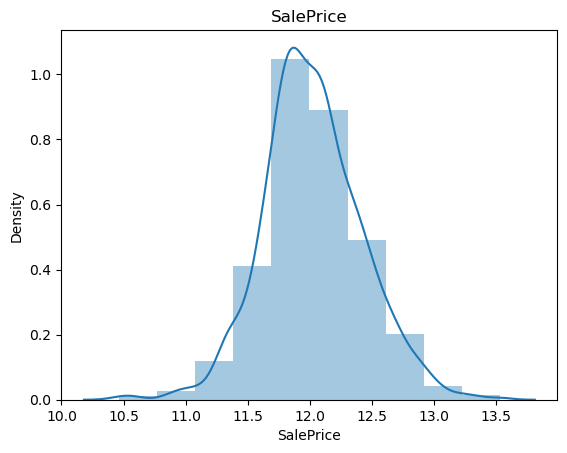

In [26]:
# Visualise the target variable -> SalePrice after transforming the sales price as otherwise scale of Target and Predictor variable will be different

df1['SalePrice'] = np.log1p(df1['SalePrice'])

plt.title('SalePrice')
sns.distplot(df1['SalePrice'], bins=10)
plt.show()

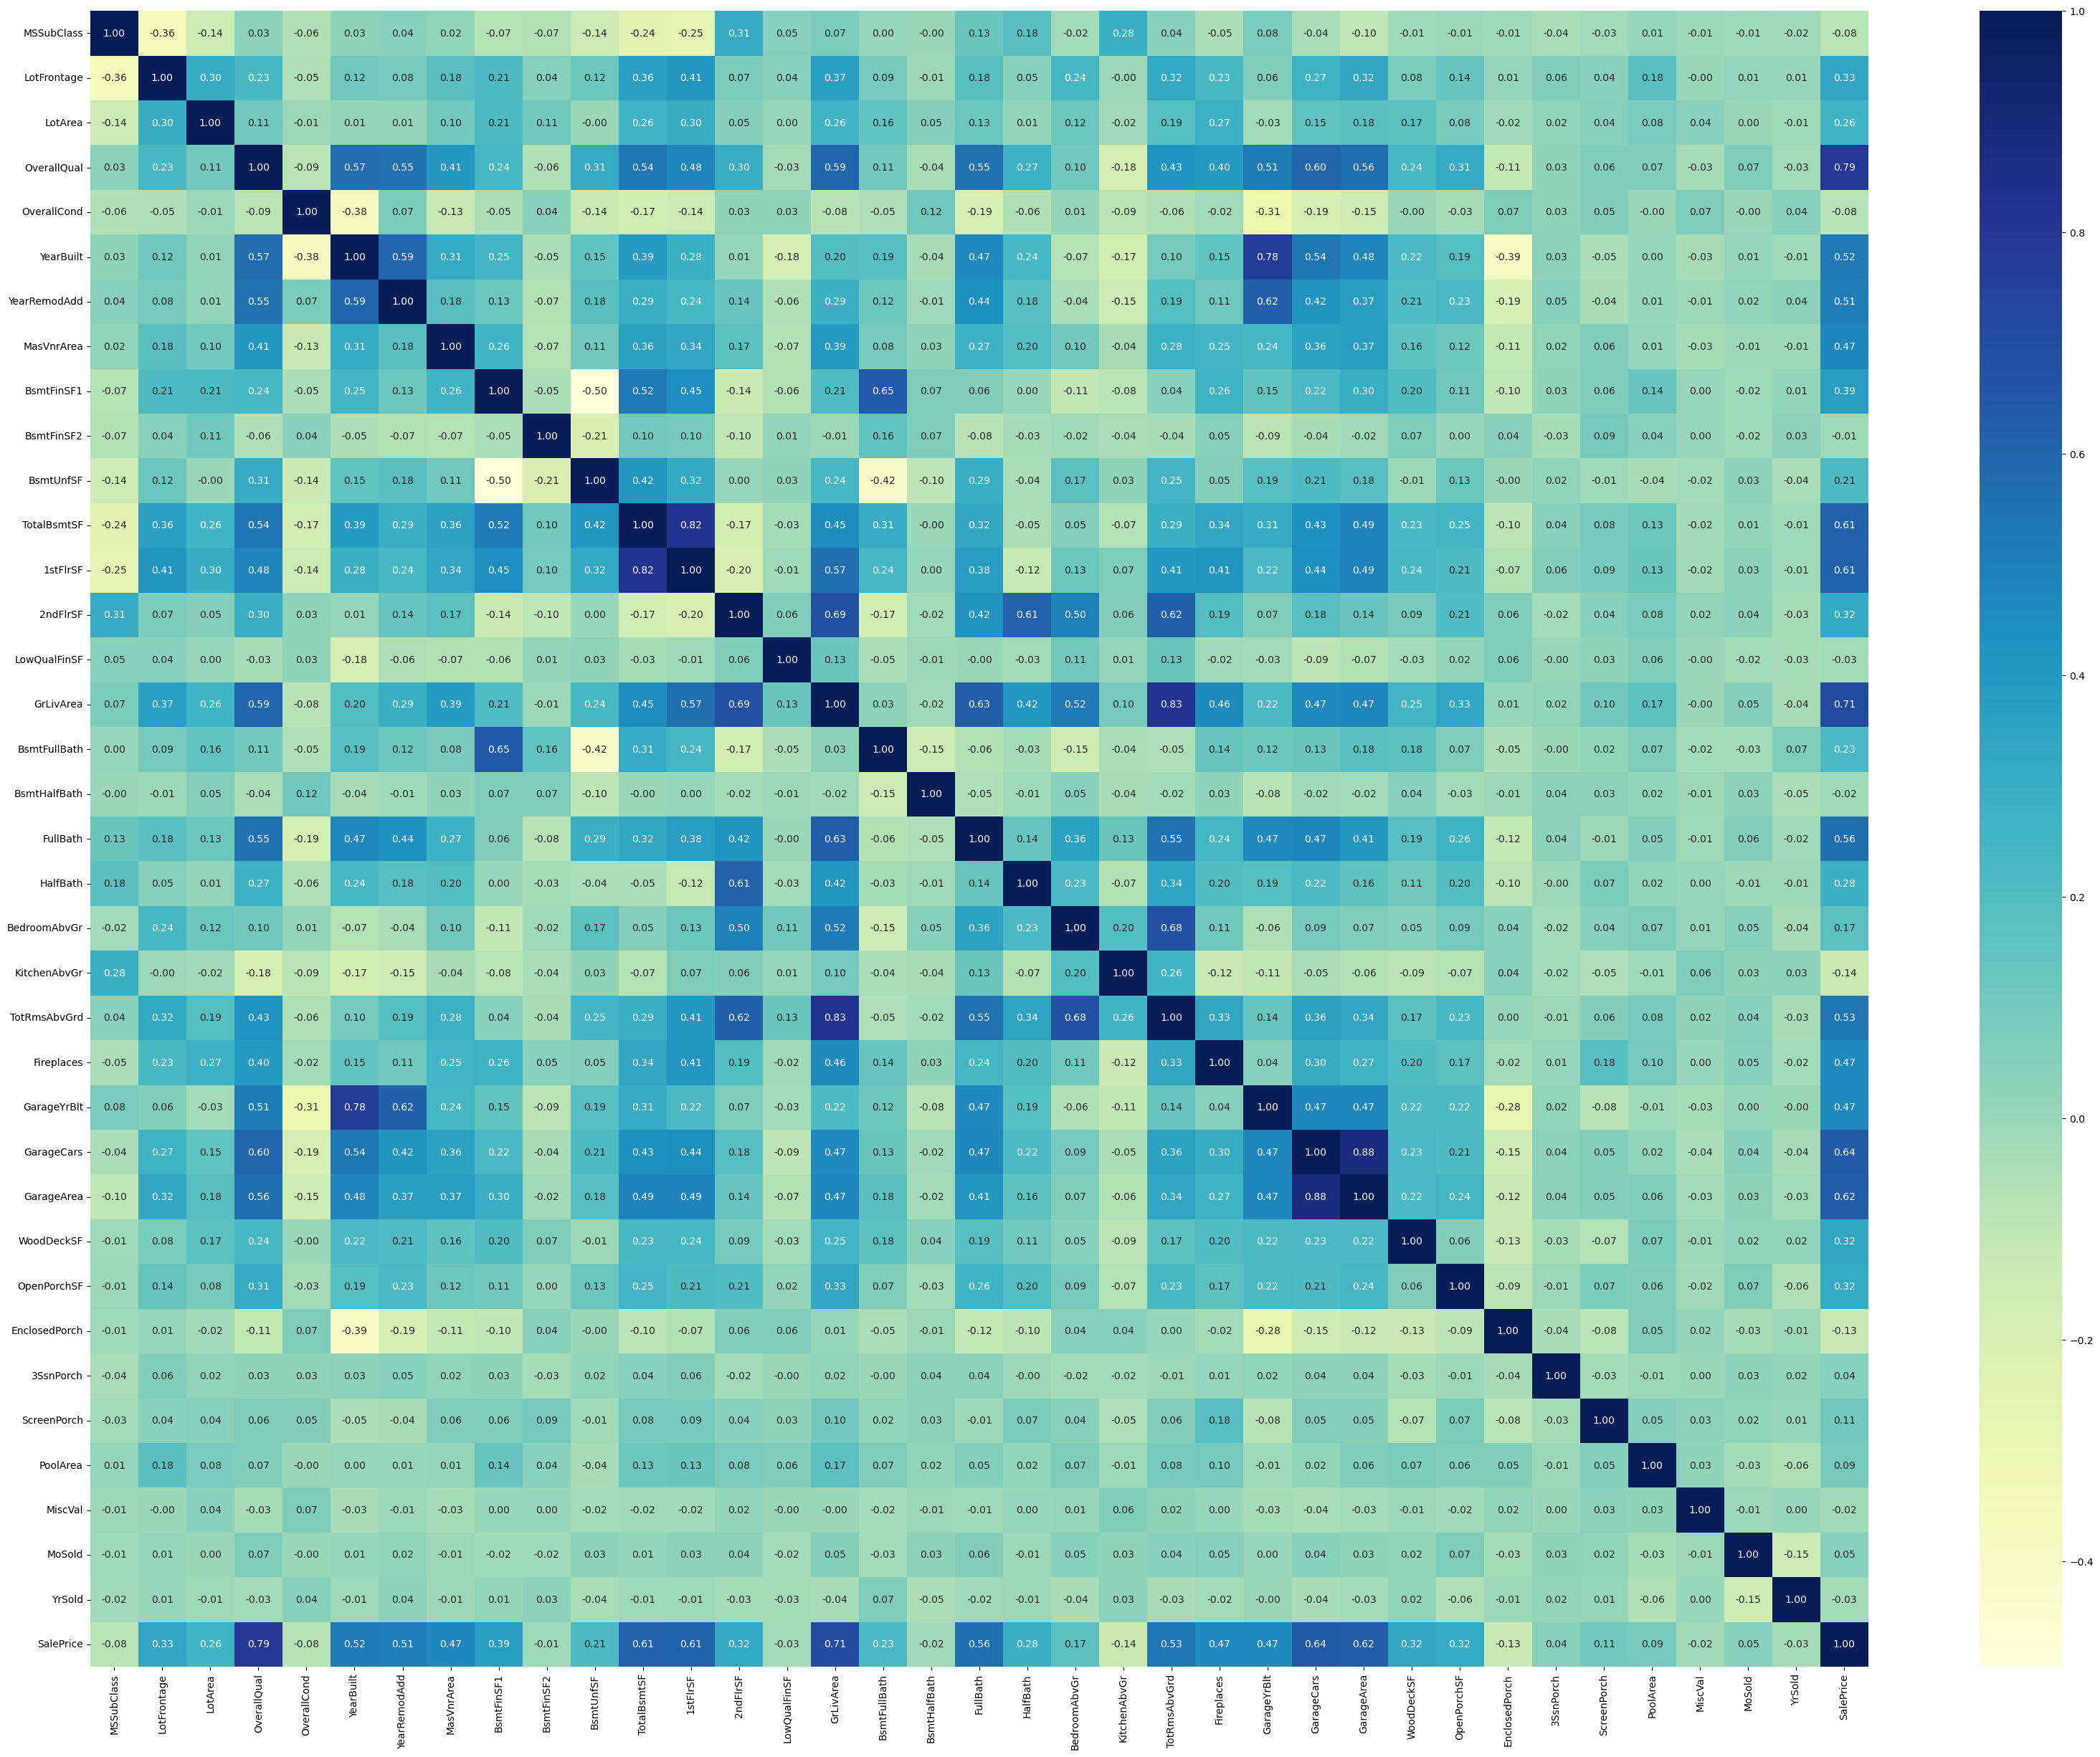

In [27]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(40,30))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", fmt =".2f", annot=True)
plt.show()

#### In above correlation metrics, few columns are highly positively and negatively correlated to each other. So, before removing these columns need to check their significance in our prediction

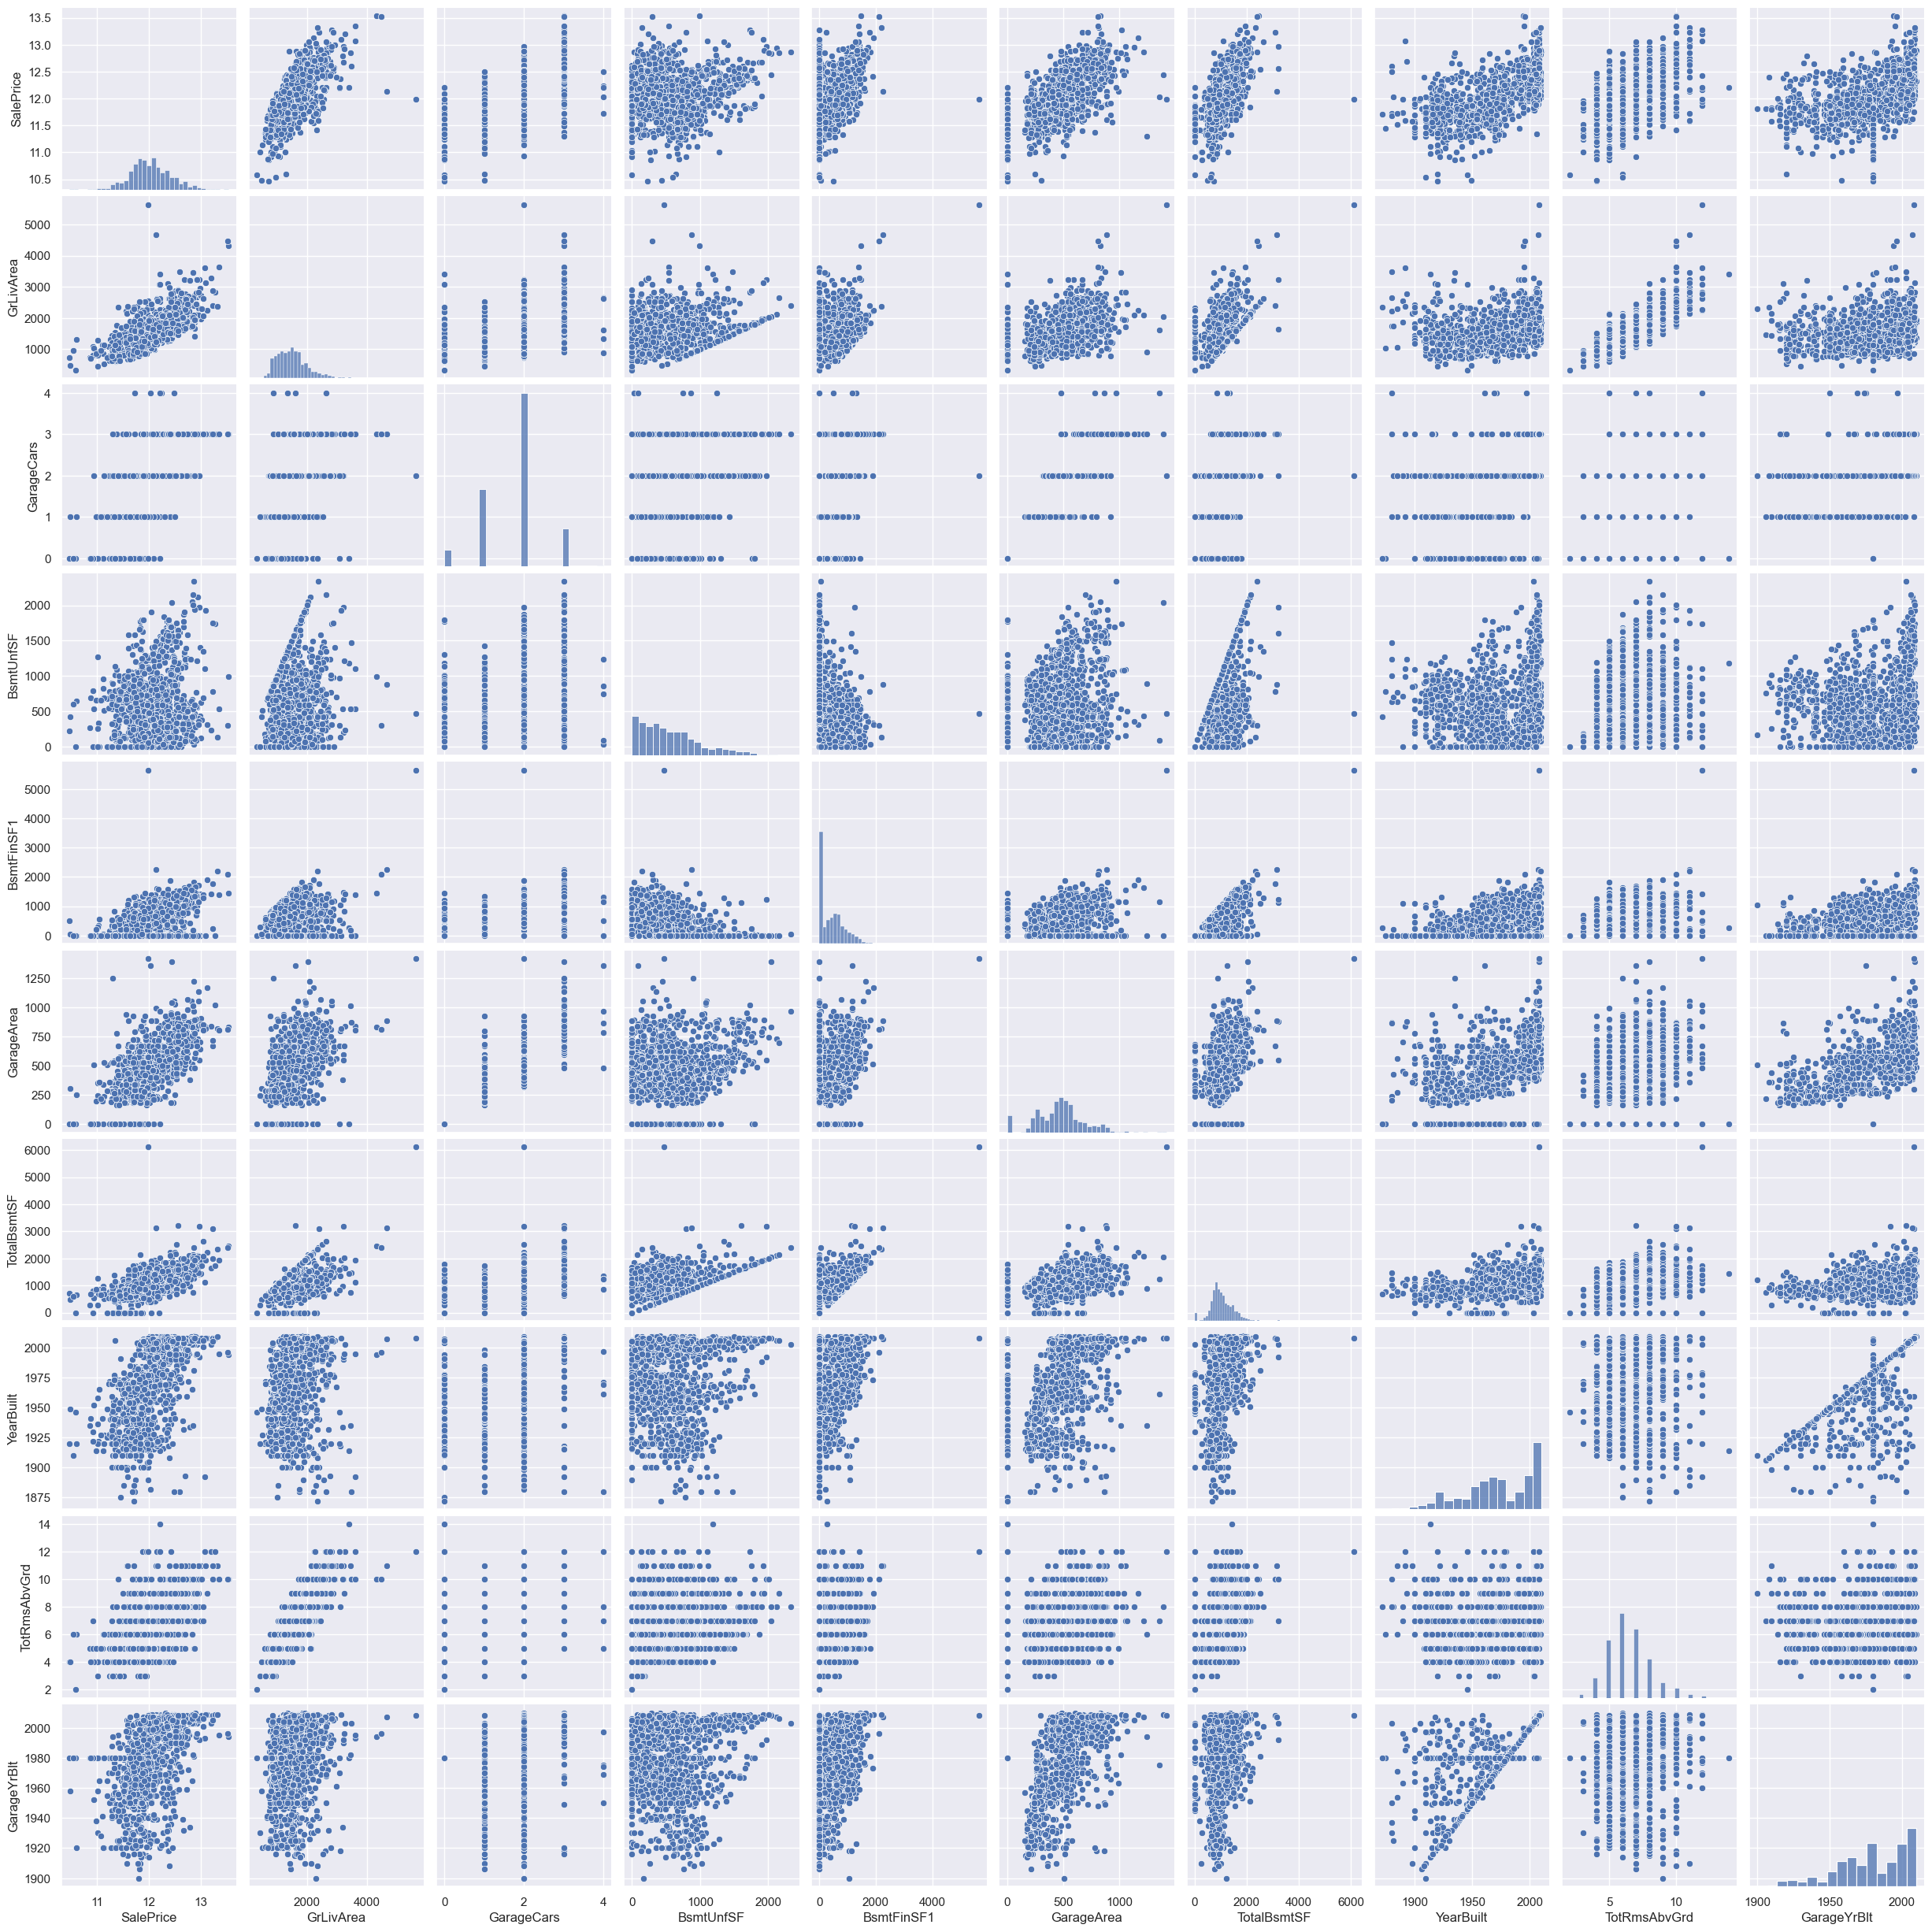

In [28]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df1[cols], size = 2.5)
plt.show()

#### Drop columns that are correlated and not contributing to 'SalePrice'

In [29]:
df1 = df1.drop(['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd','GarageYrBlt' ], axis = 1)   
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0        0       0       2    2008        WD         Normal  12.247699  
1        0       0       5    2007        WD         Normal  12.109016  
2        0       0       9    2008        WD         Normal  12.317171  
3        0       0       2    2006        WD        Abnorml  11.849405  
4        0       0      12    2008        WD         Normal  12.429220  

[5 rows x 70 columns]

#### Remove Outliers from Numeric columns

In [30]:
#Select numeric column to remove outliers
num_col = list(df1.select_dtypes(exclude=['object']).columns)
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

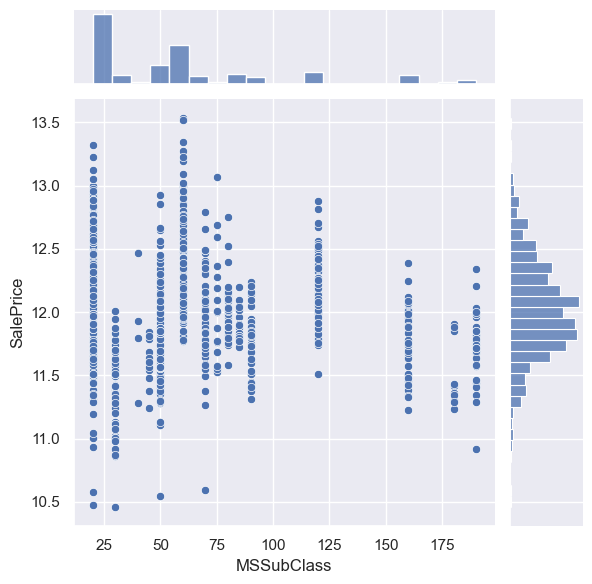

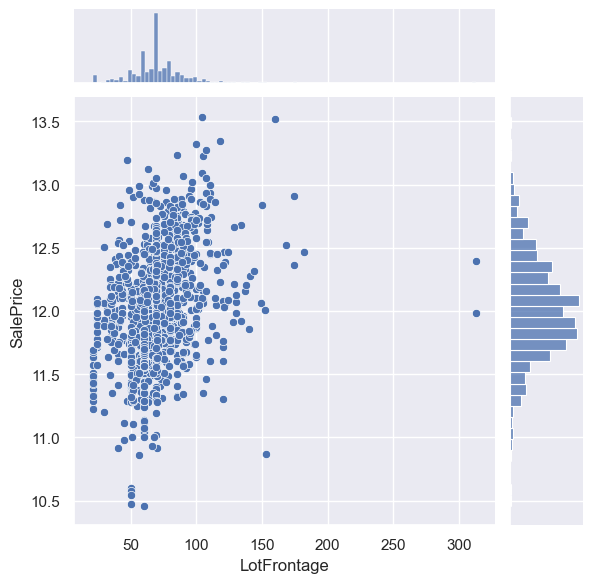

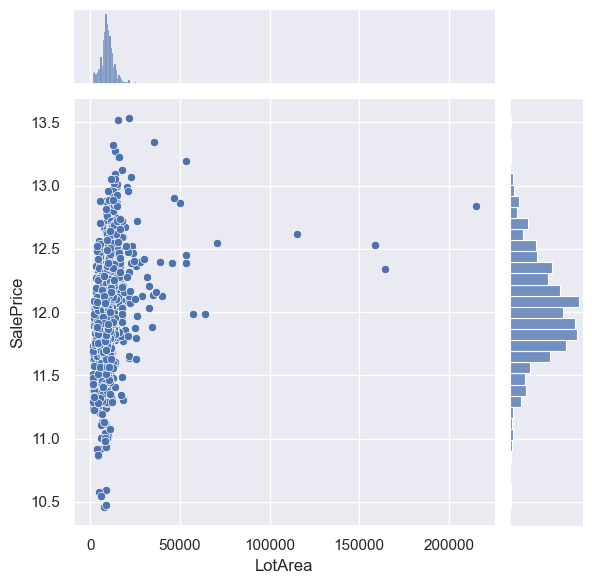

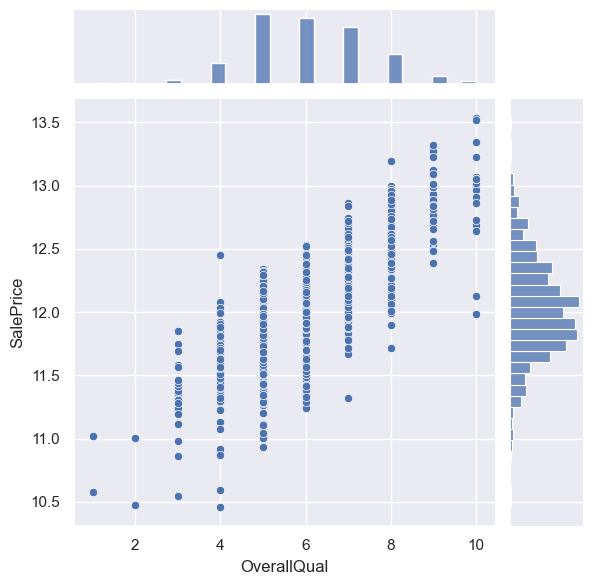

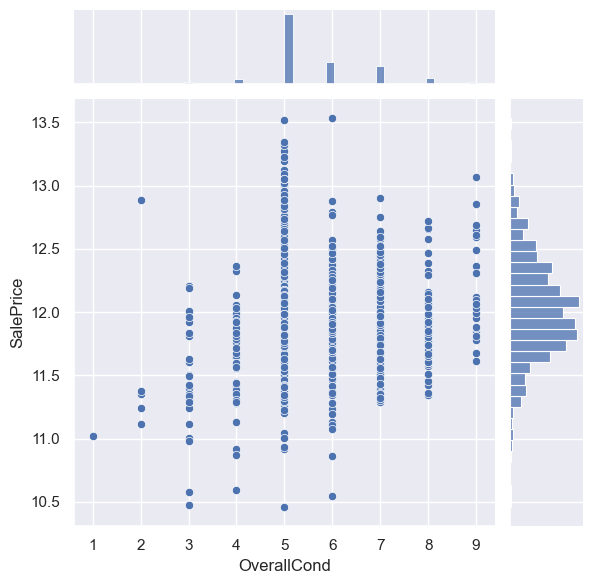

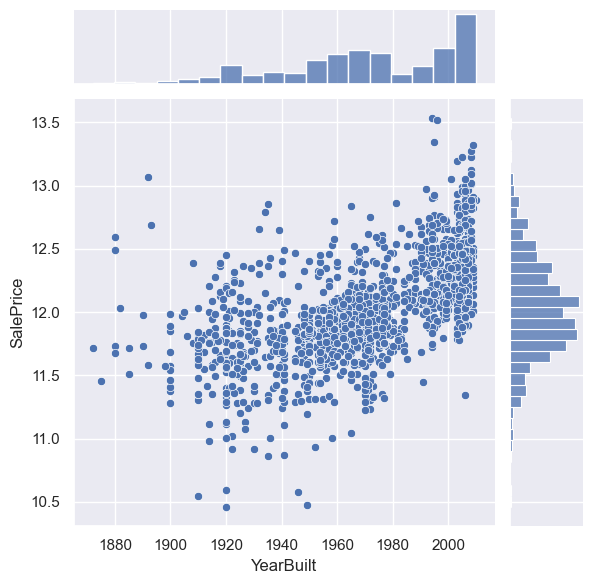

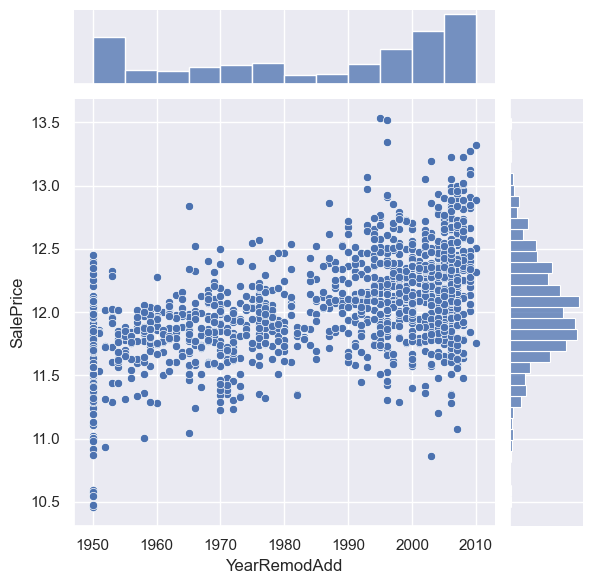

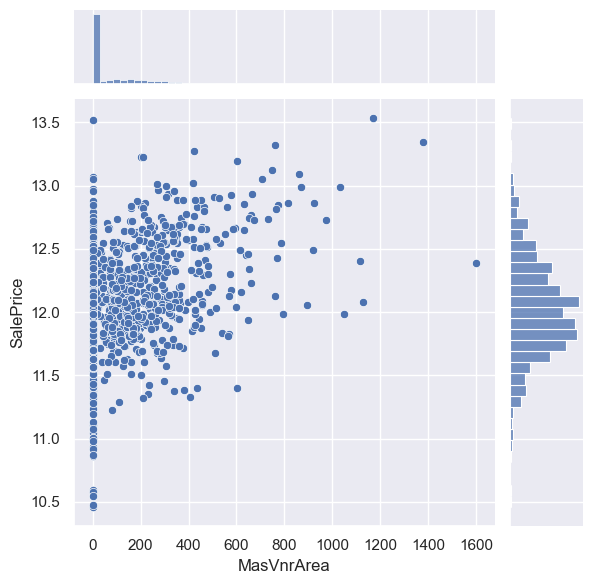

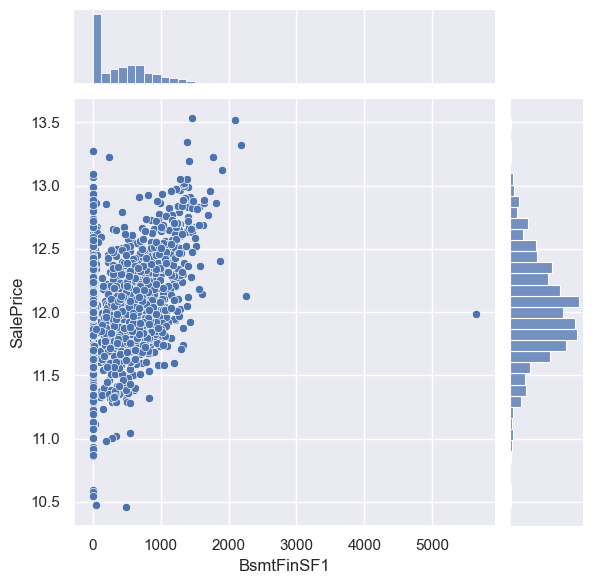

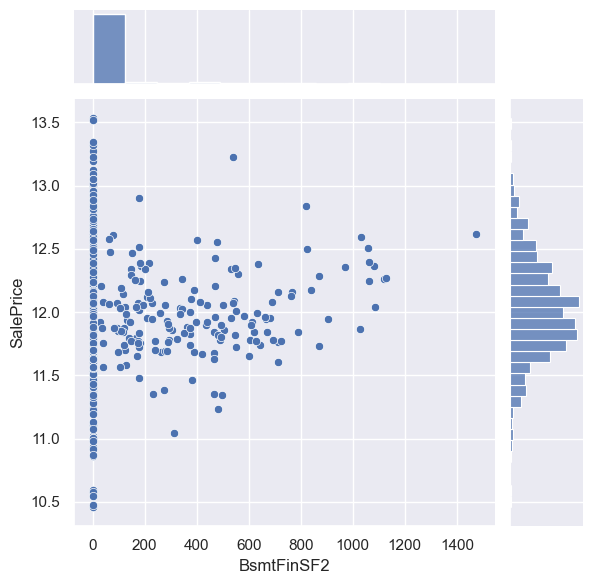

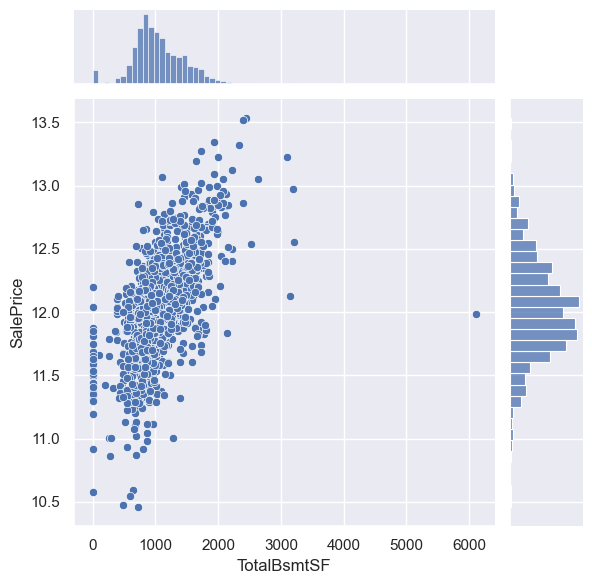

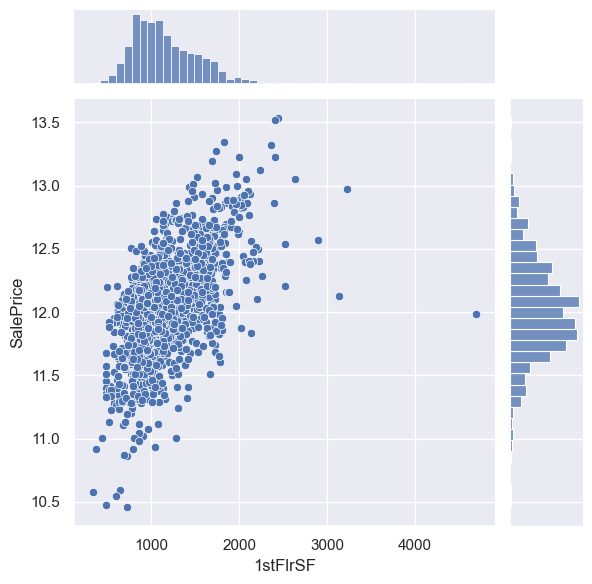

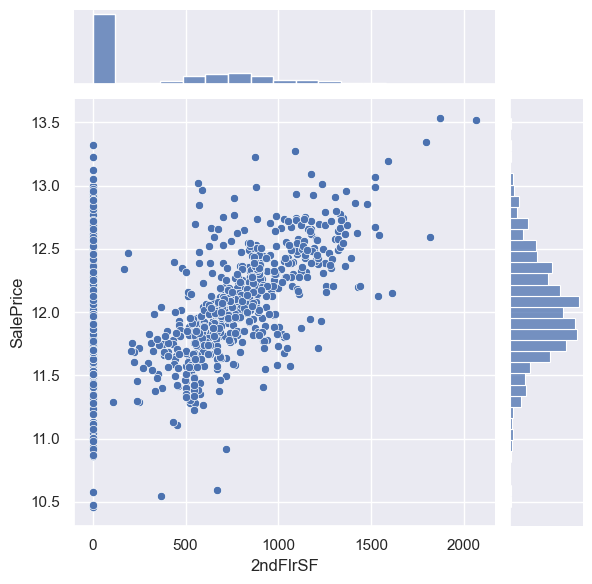

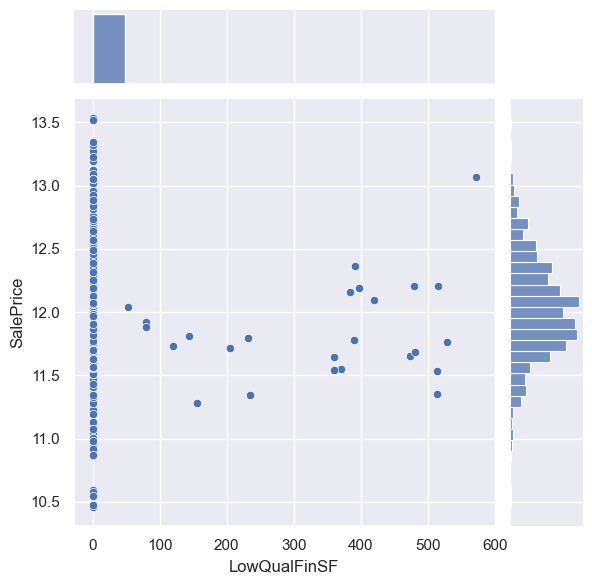

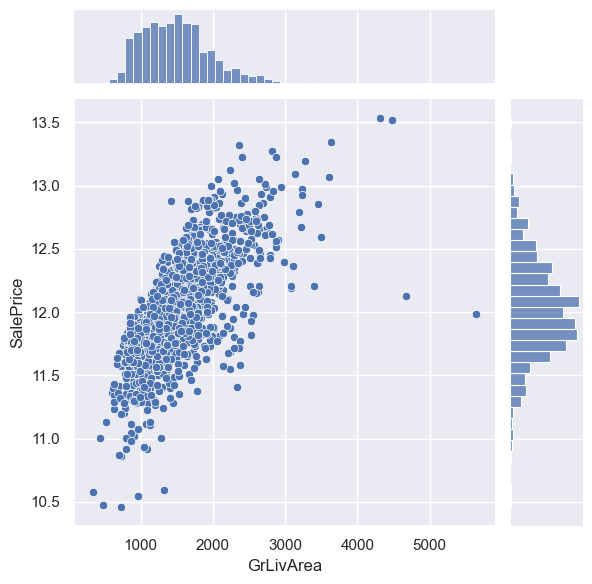

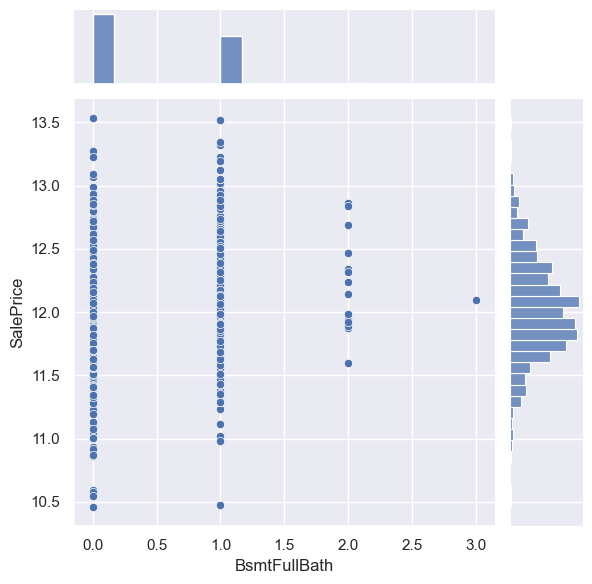

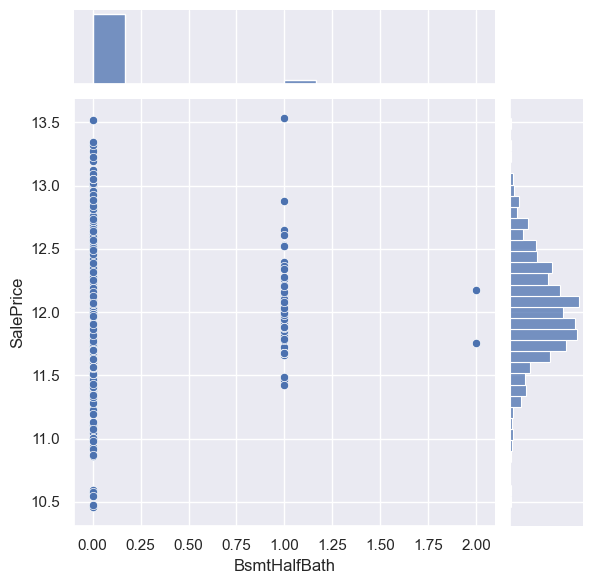

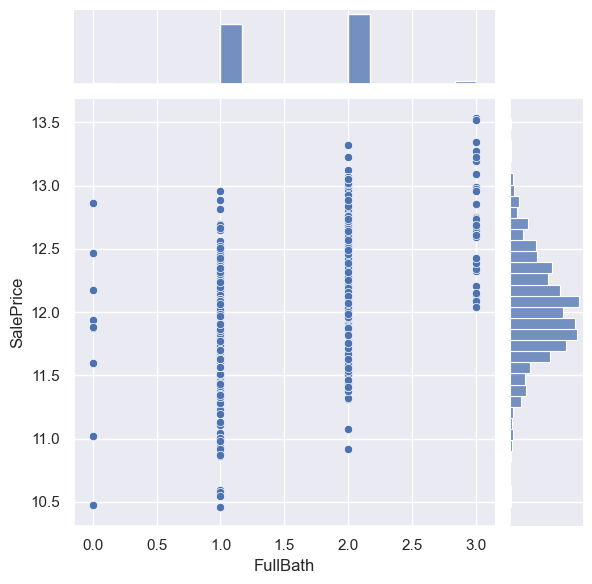

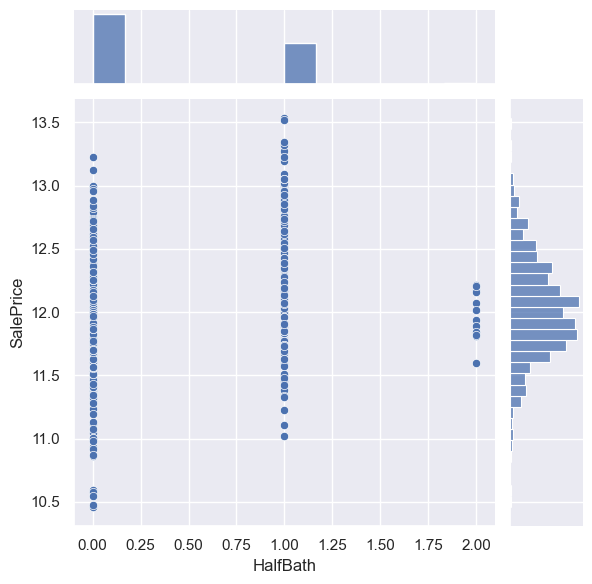

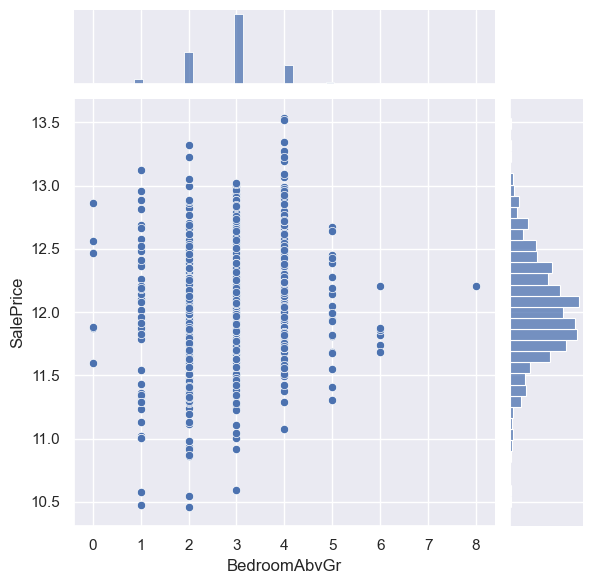

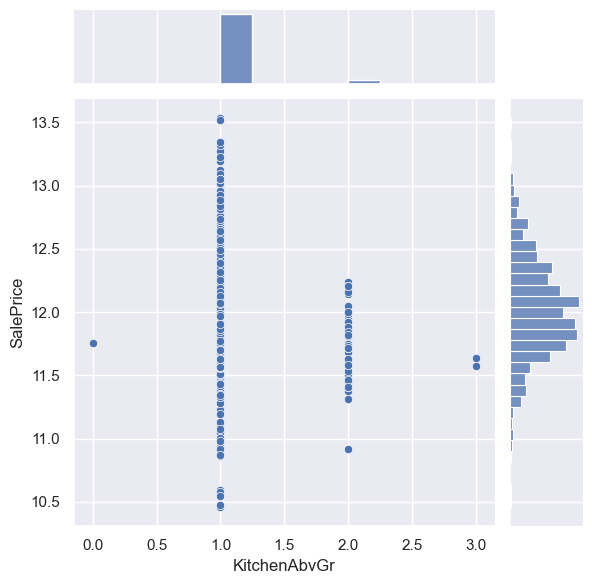

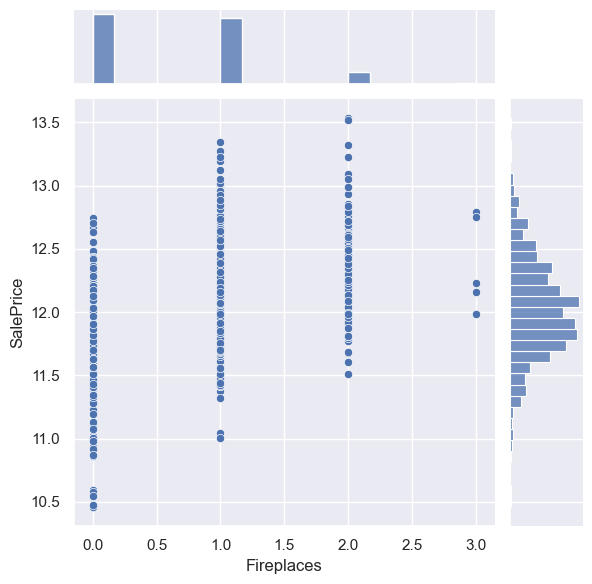

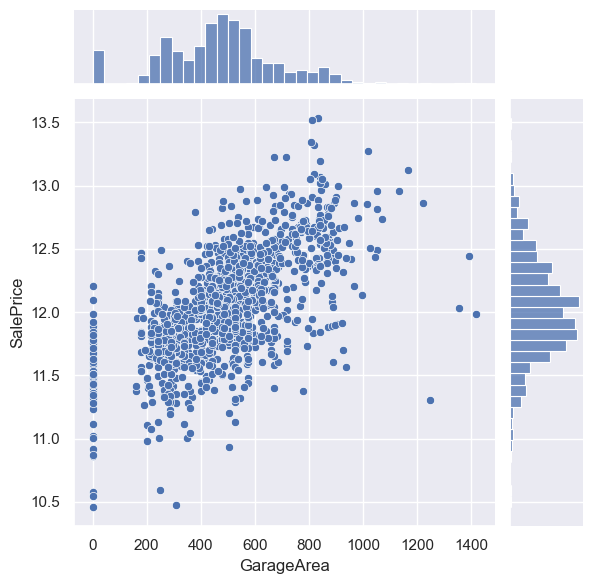

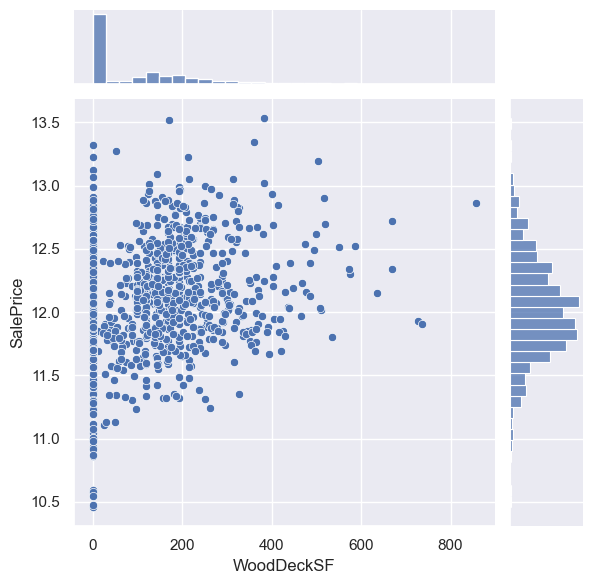

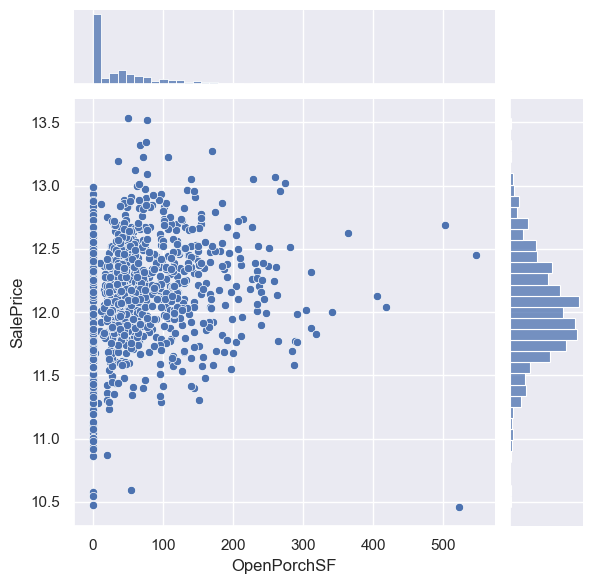

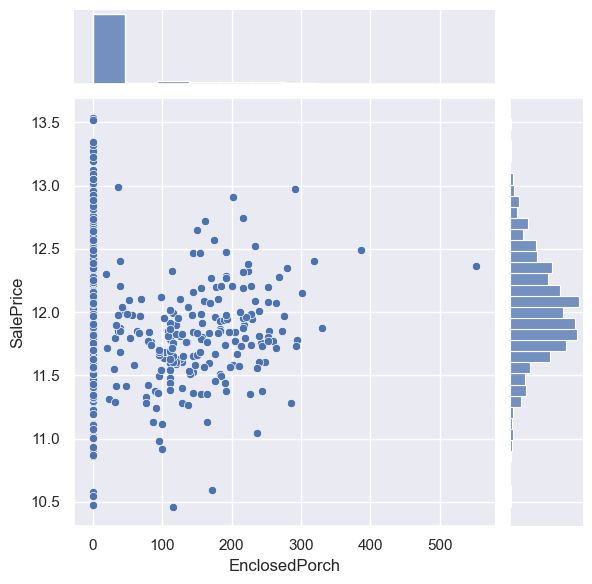

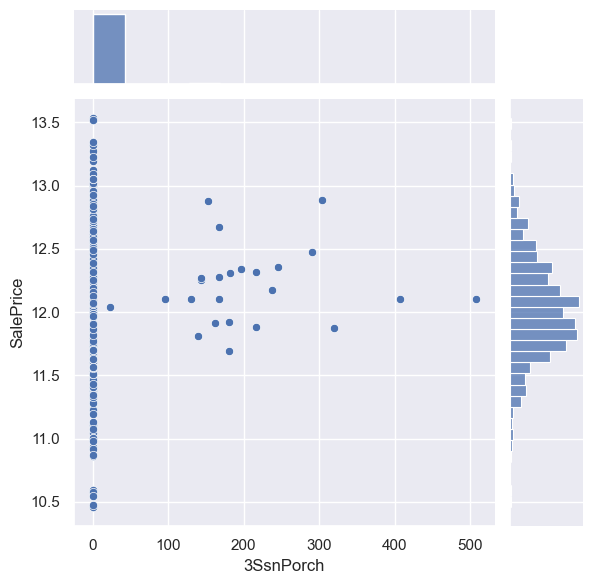

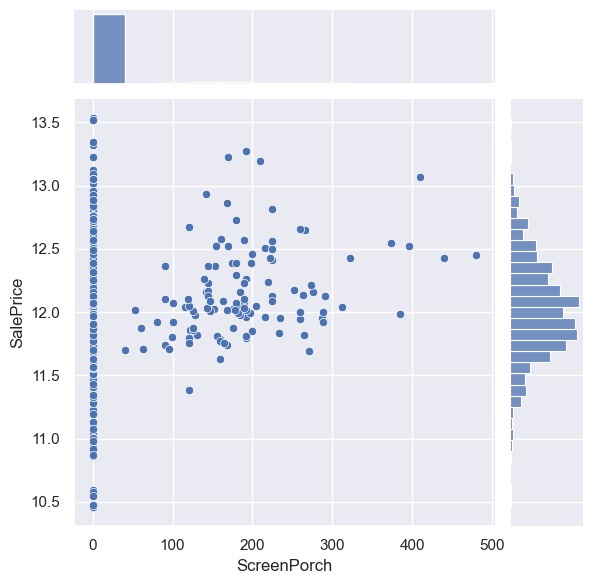

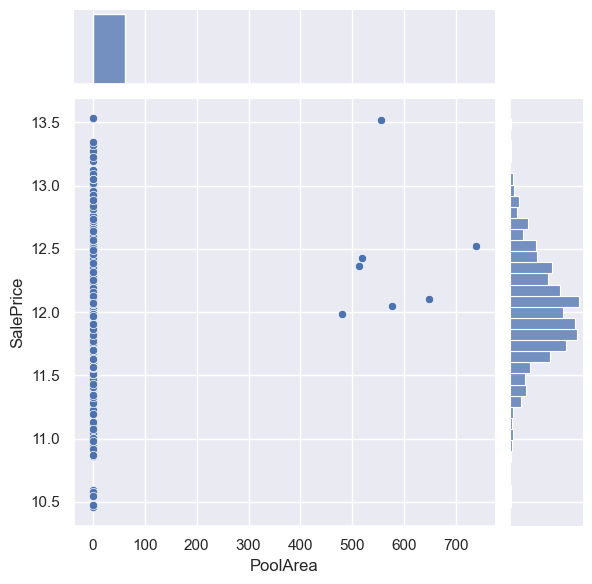

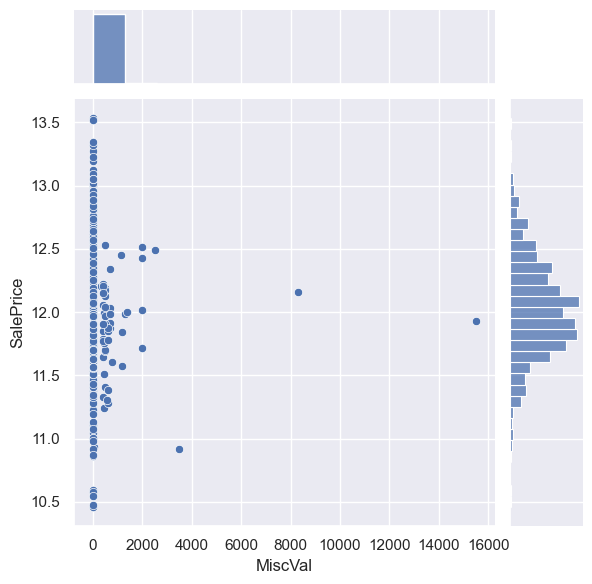

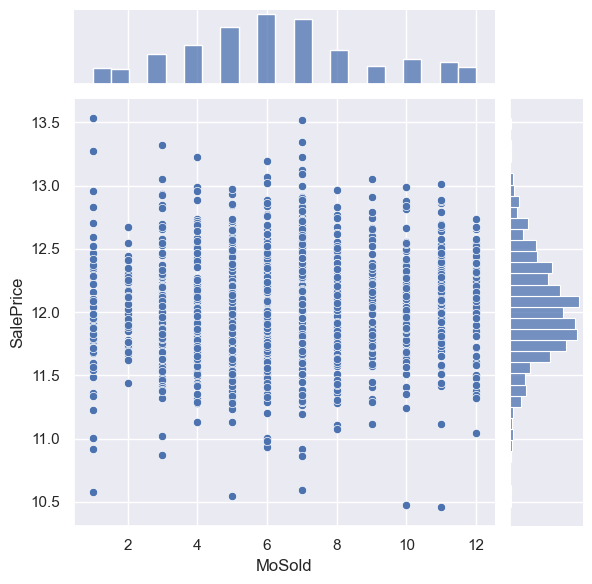

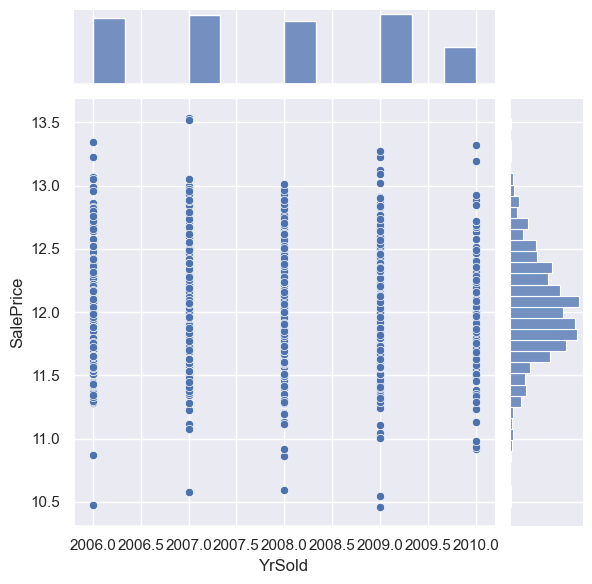

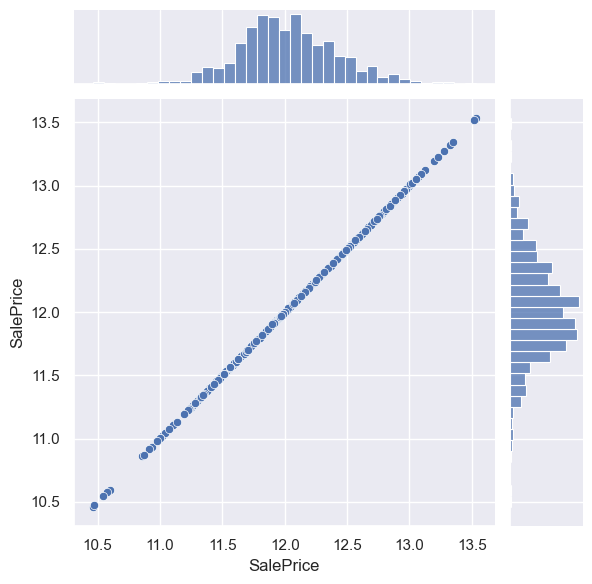

In [31]:
# Analyse some important numeric columns
for i in num_col:
    sns.jointplot(x=i, y='SalePrice', data=df1)
    plt.show()

In [32]:
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0        0       0       2    2008        WD         Normal  12.247699  
1        0       0       5    2007        WD         Normal  12.109016  
2        0       0       9    2008        WD         Normal  12.317171  
3        0       0       2    2006        WD        Abnorml  11.849405  
4        0       0      12    2008        WD         Normal  12.429220  

[5 rows x 70 columns]

#### Feature Construction: We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [33]:
# PropAge -  Property Age from yearsold - yearbuilt
df1['PropAge'] = (df1['YrSold'] - df1['YearBuilt'])
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea MiscVal  \
0    AllPub    Inside       Gtl  ...         0           0        0       0   
1    AllPub       FR2       Gtl  ...         0           0        0       0   
2    AllPub    Inside       Gtl  ...         0           0        0       0   
3    AllPub    Corner       Gtl  ...         0           0        0       0   
4    AllPub       FR2       Gtl  ...         0           0        0       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice PropAge  
0      2    2008        WD         Normal  12.247699       5  
1      5    2007        WD         Normal  12.109016      31  
2      9    2008        WD         Normal  12.317171       7  
3      2    2006        WD        Abnorml  11.849405      91  
4     12    2008        WD         Normal  12.429220       8  

[5 rows x 71 columns]

#### Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further. We had already derived the require column which satisfied the requirement of above mention 4 columns significance.

In [34]:
df1.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1, inplace = True)
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...          61             0         0   
1    AllPub       FR2       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...          42             0         0   
3    AllPub    Corner       Gtl  ...          35           272         0   
4    AllPub       FR2       Gtl  ...          84             0         0   

  ScreenPorch PoolArea  MiscVal  SaleType SaleCondition  SalePrice PropAge  
0           0        0        0        WD        Normal  12.247699       5  
1           0        0        0        WD        Normal  12.109016      31  
2           0        0        0        WD        Normal  12.317171       7  
3           0        0        0        WD       Abnorml  11.849405      91  
4           0        0        0        WD        Normal  12.429220       8  

[5 rows x 67 columns]

#### Let's check the columns which are less significant on basic of variance of that columns

In [35]:
col_list = list(df1.columns)
for i in col_list:
    print(df1[i].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside   

#### From above analysis, we can make sure that lot of columns are having 1 specific value in most of rows of that column which makes that column insignificant for our modelling as it will have skewed. So, we will remove any column that has one value repeating 1314 times (1314/1460)*100 = 90%) as this column would be skewed to one value

In [36]:
df1.shape

(1460, 67)

In [37]:
df1.isnull().sum().sort_values(ascending = False)

MSSubClass      0
GarageType      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
               ..
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
PropAge         0
Length: 67, dtype: int64

In [38]:
# Drop the following columns that have more than 85% values associated to a specific value

def getNumericalValueCounts():
    column = []
    #numerical_columns = df1.select_dtypes(include=['int64', 'float'])
    numerical_columns = df1.columns
    print('numerical column :', numerical_columns)
    for col in (numerical_columns):
        if(df1[col].value_counts().max() >= 1314):
            column.append(col)
    return column

columnsToBeRemoved = getNumericalValueCounts()
print('columns need to remove :', columnsToBeRemoved)
df1.drop(columnsToBeRemoved, axis = 1, inplace = True)
df1.head()

numerical column : Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SaleType', 

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageFinish  GarageArea  GarageQual  \
0      CollgCr       Norm     1Fam  ...          RFn         548          TA   
1      Veenker      Feedr     1Fam  ...          RFn         460          TA   
2      CollgCr       Norm     1Fam  ...          RFn         608          TA   
3      Crawfor       Norm     1Fam  ...          Unf         642          TA   
4      NoRidge       Norm     1Fam  ...          RFn         836          TA   

  WoodDeckSF OpenPorchSF EnclosedPorch  SaleType SaleCondition  SalePrice  \
0          0          61             0        WD        Normal  12.247699   
1        298           0             0        WD        Normal  12.109016   
2          0          42             0        WD        Normal  12.317171   
3          0          35           272        WD       Abnorml  11.849405   
4        192          84             0        WD        Normal  12.429220   

  PropAge  
0       5  
1      31  
2       7  
3      91  
4       8  

[5 rows x 49 columns]

### Step 3: Data Preparation
- Converting categorical data into numercal data
- Creating Dummies

#### Use Label Enconding to label the eligible categorical data 

In [39]:
df1['GarageQual'].value_counts()

GarageQual
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: count, dtype: int64

In [40]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df1['d_LotShape'] = df1['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df1['d_ExterQual'] = df1['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df1['d_ExterCond'] = df1['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df1['d_BsmtQual'] = df1['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df1['d_BsmtExposure'] = df1['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df1['d_BsmtFinType1'] = df1['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df1['d_HeatingQC'] = df1['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df1['d_KitchenQual'] = df1['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df1['d_GarageFinish'] = df1['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df1['d_BldgType'] = df1['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
df1['d_HouseStyle'] = df1['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df1['d_LotConfig'] = df1['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
df1['d_SaleCondition'] = df1['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})
df1['d_GarageQual'] = df1['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df1['d_BsmtCond'] = df1['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df1['d_BsmtFinType2'] = df1['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None':0})
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... d_HeatingQC  d_KitchenQual  \
0      CollgCr       Norm     1Fam  ...           5              4   
1      Veenker      Feedr     1Fam  ...           5              3   
2      CollgCr       Norm     1Fam  ...           5              4   
3      Crawfor       Norm     1Fam  ...           4              4   
4      NoRidge       Norm     1Fam  ...           5              4   

   d_GarageFinish d_BldgType d_HouseStyle d_LotConfig  d_SaleCondition  \
0               2          1            4           5                1   
1               2          1            1           2                1   
2               2          1            4           5                1   
3               1          1            4           4                0   
4               2          1            4           2                1   

  d_GarageQual d_BsmtCond d_BsmtFinType2  
0            3          3              1  
1            3          3              1  
2            3          3              1  
3            3          4              1  
4            3          3              1  

[5 rows x 65 columns]

In [41]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df1 = df1.drop([ 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'GarageFinish', 'BldgType', 'HouseStyle', 
                                'LotConfig', 'SaleCondition', 'GarageQual', 'BsmtCond', 'BsmtFinType2'], axis=1)

df1.head()

MSSubClass MSZoning  LotFrontage  LotArea LandContour Neighborhood  \
0          60       RL         65.0     8450         Lvl      CollgCr   
1          20       RL         80.0     9600         Lvl      Veenker   
2          60       RL         68.0    11250         Lvl      CollgCr   
3          70       RL         60.0     9550         Lvl      Crawfor   
4          60       RL         84.0    14260         Lvl      NoRidge   

  Condition1  OverallQual  OverallCond RoofStyle  ... d_HeatingQC  \
0       Norm            7            5     Gable  ...           5   
1      Feedr            6            8     Gable  ...           5   
2       Norm            7            5     Gable  ...           5   
3       Norm            7            5     Gable  ...           4   
4       Norm            8            5     Gable  ...           5   

  d_KitchenQual  d_GarageFinish d_BldgType  d_HouseStyle  d_LotConfig  \
0             4               2          1             4            5   
1             3               2          1             1            2   
2             4               2          1             4            5   
3             4               1          1             4            4   
4             4               2          1             4            2   

   d_SaleCondition  d_GarageQual  d_BsmtCond  d_BsmtFinType2  
0                1             3           3               1  
1                1             3           3               1  
2                1             3           3               1  
3                0             3           4               1  
4                1             3           3               1  

[5 rows x 49 columns]

In [42]:
df1['d_BsmtFinType2'].unique()

array([1, 4, 0, 5, 3, 2, 6], dtype=int64)

In [43]:
df1.isnull().sum().sort_values(ascending = False)

MSSubClass         0
GarageType         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
SaleType           0
SalePrice          0
PropAge            0
d_LotShape         0
d_ExterQual        0
d_ExterCond        0
d_BsmtQual         0
d_BsmtExposure     0
d_BsmtFinType1     0
d_HeatingQC        0
d_KitchenQual      0
d_GarageFinish     0
d_BldgType         0
d_HouseStyle       0
d_LotConfig        0
d_SaleCondition    0
d_GarageQual       0
d_BsmtCond         0
GarageArea         0
Fireplaces         0
MSZoning           0
BedroomAbvGr       0
LotFrontage        0
LotArea            0
LandContour        0
Neighborhood       0
Condition1         0
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrArea         0
Foundation         0
BsmtFinSF1         0
BsmtFinSF2         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath     

In [44]:
df1['d_GarageQual'].unique()

array([3, 2, 4, 0, 5, 1], dtype=int64)


#### Use one hot enconding to create dummy variable

In [45]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df1['MSZoning'], prefix='MSZoning', drop_first = True)
df1 = pd.concat([df1, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df1['Neighborhood'], prefix='Neighborhood', drop_first = True)
df1 = pd.concat([df1, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df1['RoofStyle'], prefix='RoofStyle', drop_first = True)
df1 = pd.concat([df1, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df1['Exterior1st'], prefix='Exterior1st', drop_first = True)
df1 = pd.concat([df1, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df1['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df1 = pd.concat([df1, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df1['Foundation'], prefix='Foundation', drop_first = True)
df1 = pd.concat([df1, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df1['GarageType'], prefix='GarageType', drop_first = True)
df1 = pd.concat([df1, d_GarageType], axis = 1)

# Creating dummies for SaleType

d_SaleType = pd.get_dummies(df1['SaleType'], prefix='SaleType', drop_first = True)
df1 = pd.concat([df1, d_SaleType], axis = 1)

# Creating dummies for LandContour

d_LandContour = pd.get_dummies(df1['LandContour'], prefix='LandContour', drop_first = True)
df1 = pd.concat([df1, d_LandContour], axis = 1)

# Creating dummies for Condition1

d_Condition1 = pd.get_dummies(df1['Condition1'], prefix='Condition1', drop_first = True)
df1 = pd.concat([df1, d_Condition1], axis = 1)

df1.head()

MSSubClass MSZoning  LotFrontage  LotArea LandContour Neighborhood  \
0          60       RL         65.0     8450         Lvl      CollgCr   
1          20       RL         80.0     9600         Lvl      Veenker   
2          60       RL         68.0    11250         Lvl      CollgCr   
3          70       RL         60.0     9550         Lvl      Crawfor   
4          60       RL         84.0    14260         Lvl      NoRidge   

  Condition1  OverallQual  OverallCond RoofStyle  ... LandContour_Low  \
0       Norm            7            5     Gable  ...           False   
1      Feedr            6            8     Gable  ...           False   
2       Norm            7            5     Gable  ...           False   
3       Norm            7            5     Gable  ...           False   
4       Norm            8            5     Gable  ...           False   

  LandContour_Lvl  Condition1_Feedr Condition1_Norm  Condition1_PosA  \
0            True             False            True            False   
1            True              True           False            False   
2            True             False            True            False   
3            True             False            True            False   
4            True             False            True            False   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Condition1_RRNn  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 141 columns]

In [46]:
df1.isnull().sum().sort_values(ascending = False)

MSSubClass             0
Exterior2nd_Brk Cmn    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
                      ..
d_GarageFinish         0
d_KitchenQual          0
d_HeatingQC            0
d_BsmtFinType1         0
Condition1_RRNn        0
Length: 141, dtype: int64

In [47]:
# drop the below columns as we now have new columns derived from these columns

df1 = df1.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType', 'SaleType','LandContour', 'Condition1' ], axis=1)

df1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  LandContour_Low  \
0         706           0          856       856  ...            False   
1         978           0         1262      1262  ...            False   
2         486           0          920       920  ...            False   
3         216           0          756       961  ...            False   
4         655           0         1145      1145  ...            False   

   LandContour_Lvl  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0             True             False             True            False   
1             True              True            False            False   
2             True             False             True            False   
3             True             False             True            False   
4             True             False             True            False   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Condition1_RRNn  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 131 columns]

####  Train Test Split the data to Scale

In [48]:
# Putting all feature variable to X

X = df1.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  LandContour_Low  \
0         706           0          856       856  ...            False   
1         978           0         1262      1262  ...            False   
2         486           0          920       920  ...            False   
3         216           0          756       961  ...            False   
4         655           0         1145      1145  ...            False   

   LandContour_Lvl  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0             True             False             True            False   
1             True              True            False            False   
2             True             False             True            False   
3             True             False             True            False   
4             True             False             True            False   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Condition1_RRNn  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 130 columns]

In [49]:
X.isnull().sum().sort_values(ascending = False)

MSSubClass             0
Exterior2nd_VinylSd    0
Exterior2nd_Stone      0
Exterior2nd_Plywood    0
Exterior2nd_Other      0
                      ..
MSZoning_FV            0
d_BsmtFinType2         0
d_BsmtCond             0
d_GarageQual           0
Condition1_RRNn        0
Length: 130, dtype: int64

In [50]:
# Putting response variable to y

y = df1['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features using StandardScalar

In [51]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'LandContour_Low', 'LandContour_Lvl', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn'],
      dtype='object', length=130)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=50)

In [53]:
X_train.isnull().sum().sort_values(ascending = False)

MSSubClass             0
Exterior2nd_VinylSd    0
Exterior2nd_Stone      0
Exterior2nd_Plywood    0
Exterior2nd_Other      0
                      ..
MSZoning_FV            0
d_BsmtFinType2         0
d_BsmtCond             0
d_GarageQual           0
Condition1_RRNn        0
Length: 130, dtype: int64

### 4. Model Building and Evaluation

In [54]:
# Running RFE with the output number of the variable equal to 50
# running RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [55]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 25),
 ('BsmtFinSF1', False, 37),
 ('BsmtFinSF2', False, 69),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 41),
 ('EnclosedPorch', False, 10),
 ('PropAge', True, 1),
 ('d_LotShape', False, 71),
 ('d_ExterQual', False, 35),
 ('d_ExterCond', False, 65),
 ('d_BsmtQual', True, 1),
 ('d_BsmtExposure', True, 1),
 ('d_BsmtFinType1', True, 1),
 ('d_HeatingQC', True, 1),
 ('d_KitchenQual', True, 1),
 ('d_GarageFinish', True, 1),
 ('d_BldgType', True, 1),
 ('d_HouseStyle', True, 1),
 ('d_LotConfig', False, 67),
 ('d_SaleCondition', True, 1),
 ('d_GarageQual', False, 6),
 ('d_BsmtCond', Fa

In [56]:
# Select the top 50 variables

col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea',
       'PropAge', 'd_BsmtQual', 'd_BsmtExposure', 'd_BsmtFinType1',
       'd_HeatingQC', 'd_KitchenQual', 'd_GarageFinish', 'd_BldgType',
       'd_HouseStyle', 'd_SaleCondition', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Stone', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'Condition1_Norm'],
     

In [57]:
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'd_LotShape', 'd_ExterQual', 'd_ExterCond',
       'd_LotConfig', 'd_GarageQual', 'd_BsmtCond', 'd_BsmtFinType2',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exteri

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 5: Model Building and Evaluation

#### Ridge 

In [84]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
24         100         -0.083860        -0.089751                1
23          50         -0.083586        -0.090214                2
22          20         -0.083591        -0.090593                3
21        10.0         -0.083545        -0.090697                4
20         9.0         -0.083540        -0.090704                5
19         8.0         -0.083537        -0.090725                6
18         7.0         -0.083533        -0.090764                7
17         6.0         -0.083526        -0.090806                8
16         5.0         -0.083515        -0.090850                9
15         4.0         -0.083508        -0.090900               10
14         3.0         -0.083507        -0.090957               11
13         2.0         -0.083516        -0.091033               12
12         1.0         -0.083526        -0.091138               13
11         0.9         -0.083527        -0.091152               14
10         0.8         -0.083529        -0.091167               15
9          0.7         -0.083530        -0.091182               16
8          0.6         -0.083531        -0.091197               17
7          0.5         -0.083533        -0.091213               18
6          0.4         -0.083534        -0.091231               19
5          0.3         -0.083536        -0.091248               20
4          0.2         -0.083539        -0.091267               21
3          0.1         -0.083542        -0.091287               22
2         0.01         -0.083544        -0.091305               23
1        0.001         -0.083544        -0.091307               24
0       0.0001         -0.083544        -0.091307               25
25         500         -0.089571        -0.093038               26

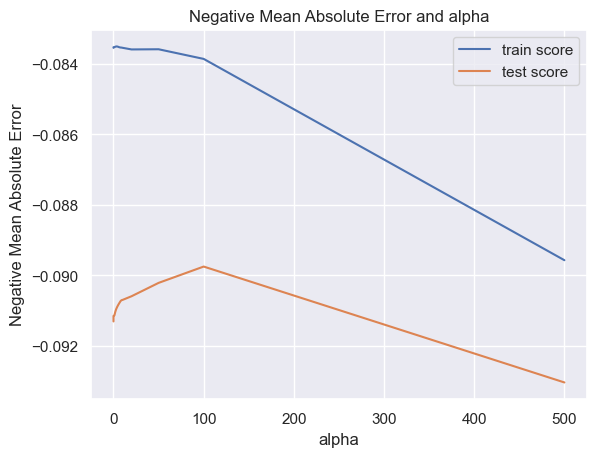

In [86]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [87]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100)

In [88]:
# check the coefficient values with lambda = 100

alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01307541, -0.00923601,  0.01623201,  0.07663463,  0.04482266,
        0.00125854,  0.0457489 ,  0.02481305,  0.05453111,  0.0222088 ,
        0.02860735,  0.0185594 ,  0.01730328,  0.02428113,  0.0393466 ,
       -0.03464006,  0.02593046,  0.02357466,  0.02025215,  0.01570567,
        0.02420962,  0.01619156, -0.01342087, -0.00701607,  0.01762873,
        0.02371361,  0.00963884,  0.02920232, -0.00070665,  0.02329823,
       -0.01549539, -0.01572032,  0.01747882,  0.02415072,  0.01829262,
       -0.01628462,  0.01151765, -0.00220565, -0.01034631,  0.01044696,
       -0.0126671 ,  0.00804284,  0.01060045,  0.00634773,  0.01724156,
        0.00412518,  0.01422804,  0.01045594,  0.00865842,  0.01591791])

In [89]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01968915521319153

In [90]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             MSSubClass      -0.0131
1            LotFrontage      -0.0092
2                LotArea       0.0162
3            OverallQual       0.0766
4            OverallCond       0.0448
5            TotalBsmtSF       0.0013
6               1stFlrSF       0.0457
7               2ndFlrSF       0.0248
8              GrLivArea       0.0545
9           BsmtFullBath       0.0222
10              FullBath       0.0286
11              HalfBath       0.0186
12          BedroomAbvGr       0.0173
13            Fireplaces       0.0243
14            GarageArea       0.0393
15               PropAge      -0.0346
16            d_BsmtQual       0.0259
17        d_BsmtExposure       0.0236
18        d_BsmtFinType1       0.0203
19           d_HeatingQC       0.0157
20         d_KitchenQual       0.0242
21        d_GarageFinish       0.0162
22            d_BldgType      -0.0134
23          d_HouseStyle      -0.0070
24       d_SaleCondition       0.0176
25           MSZoning_FV       0.0237
26           MSZoning_RH       0.0096
27           MSZoning_RL       0.0292
28           MSZoning_RM      -0.0007
29  Neighborhood_Crawfor       0.0233
30  Neighborhood_Edwards      -0.0155
31  Neighborhood_MeadowV      -0.0157
32  Neighborhood_NoRidge       0.0175
33  Neighborhood_NridgHt       0.0242
34  Neighborhood_StoneBr       0.0183
35   Exterior1st_BrkComm      -0.0163
36   Exterior1st_BrkFace       0.0115
37    Exterior1st_CBlock      -0.0022
38   Exterior1st_Wd Sdng      -0.0103
39   Exterior2nd_CmentBd       0.0104
40    Exterior2nd_Stucco      -0.0127
41   Exterior2nd_VinylSd       0.0080
42   Exterior2nd_Wd Sdng       0.0106
43     Foundation_CBlock       0.0063
44      Foundation_PConc       0.0172
45      Foundation_Stone       0.0041
46     GarageType_Attchd       0.0142
47    GarageType_BuiltIn       0.0105
48     GarageType_Detchd       0.0087
49       Condition1_Norm       0.0159

In [91]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0131,
 'LotFrontage': -0.0092,
 'LotArea': 0.0162,
 'OverallQual': 0.0766,
 'OverallCond': 0.0448,
 'TotalBsmtSF': 0.0013,
 '1stFlrSF': 0.0457,
 '2ndFlrSF': 0.0248,
 'GrLivArea': 0.0545,
 'BsmtFullBath': 0.0222,
 'FullBath': 0.0286,
 'HalfBath': 0.0186,
 'BedroomAbvGr': 0.0173,
 'Fireplaces': 0.0243,
 'GarageArea': 0.0393,
 'PropAge': -0.0346,
 'd_BsmtQual': 0.0259,
 'd_BsmtExposure': 0.0236,
 'd_BsmtFinType1': 0.0203,
 'd_HeatingQC': 0.0157,
 'd_KitchenQual': 0.0242,
 'd_GarageFinish': 0.0162,
 'd_BldgType': -0.0134,
 'd_HouseStyle': -0.007,
 'd_SaleCondition': 0.0176,
 'MSZoning_FV': 0.0237,
 'MSZoning_RH': 0.0096,
 'MSZoning_RL': 0.0292,
 'MSZoning_RM': -0.0007,
 'Neighborhood_Crawfor': 0.0233,
 'Neighborhood_Edwards': -0.0155,
 'Neighborhood_MeadowV': -0.0157,
 'Neighborhood_NoRidge': 0.0175,
 'Neighborhood_NridgHt': 0.0242,
 'Neighborhood_StoneBr': 0.0183,
 'Exterior1st_BrkComm': -0.0163,
 'Exterior1st_BrkFace': 0.0115,
 'Exterior1st_CBlock': -0.0022,
 'Exterior1

In [92]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)              
rfe = rfe.fit(X_train_ridge, y_train)

In [93]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
0    OverallQual         True            1       0.0766
4      GrLivArea         True            1       0.0545
2       1stFlrSF         True            1       0.0457
1    OverallCond         True            1       0.0448
6     GarageArea         True            1       0.0393
13   MSZoning_RL         True            1       0.0292
8     d_BsmtQual         True            1       0.0259
3       2ndFlrSF         True            1       0.0248
11   MSZoning_FV         True            1       0.0237
5   BsmtFullBath         True            1       0.0222

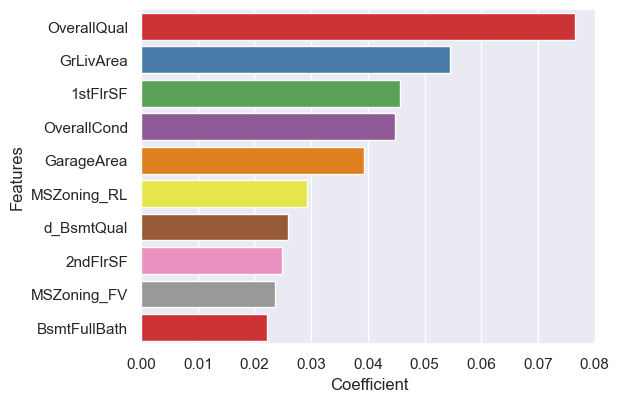

In [94]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [95]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
7        0.003         -0.084005        -0.089710                1
8        0.004         -0.084358        -0.089738                2
9        0.005         -0.084882        -0.089883                3
6        0.002         -0.083831        -0.090250                4
5        0.001         -0.083520        -0.090520                5
4       0.0005         -0.083357        -0.090738                6
3       0.0004         -0.083363        -0.090837                7
2       0.0003         -0.083389        -0.090938                8
1       0.0002         -0.083427        -0.091046                9
0       0.0001         -0.083476        -0.091165               10
10        0.01         -0.088658        -0.092657               11

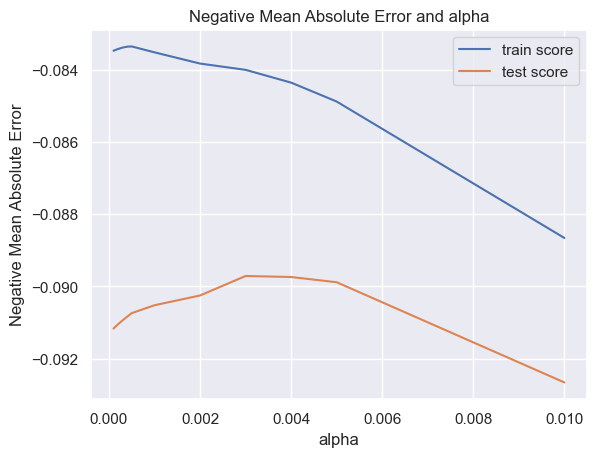

In [97]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [98]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.003)

In [106]:
# check the coefficient values with lambda = 0.003

alpha = 0.003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01347323, -0.00641567,  0.01462821,  0.09254348,  0.04829068,
        0.        ,  0.01931306,  0.        ,  0.0981559 ,  0.02180326,
        0.02278815,  0.01192308,  0.01200797,  0.02141062,  0.04027209,
       -0.04916161,  0.02310861,  0.0209768 ,  0.01958119,  0.01389975,
        0.01937952,  0.01593841, -0.01247816, -0.00651731,  0.01724671,
        0.0219623 ,  0.00678177,  0.03130236, -0.        ,  0.02133179,
       -0.01433212, -0.00970173,  0.01245751,  0.02068111,  0.01599382,
       -0.01420726,  0.01145845, -0.        , -0.00010297,  0.00412845,
       -0.01153471,  0.00278485,  0.        ,  0.        ,  0.00822104,
        0.00189045,  0.00136807,  0.0017274 ,  0.        ,  0.01501878])

In [107]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01920407038132788

In [108]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             MSSubClass      -0.0135
1            LotFrontage      -0.0064
2                LotArea       0.0146
3            OverallQual       0.0925
4            OverallCond       0.0483
5               1stFlrSF       0.0193
6              GrLivArea       0.0982
7           BsmtFullBath       0.0218
8               FullBath       0.0228
9               HalfBath       0.0119
10          BedroomAbvGr       0.0120
11            Fireplaces       0.0214
12            GarageArea       0.0403
13               PropAge      -0.0492
14            d_BsmtQual       0.0231
15        d_BsmtExposure       0.0210
16        d_BsmtFinType1       0.0196
17           d_HeatingQC       0.0139
18         d_KitchenQual       0.0194
19        d_GarageFinish       0.0159
20            d_BldgType      -0.0125
21          d_HouseStyle      -0.0065
22       d_SaleCondition       0.0172
23           MSZoning_FV       0.0220
24           MSZoning_RH       0.0068
25           MSZoning_RL       0.0313
26  Neighborhood_Crawfor       0.0213
27  Neighborhood_Edwards      -0.0143
28  Neighborhood_MeadowV      -0.0097
29  Neighborhood_NoRidge       0.0125
30  Neighborhood_NridgHt       0.0207
31  Neighborhood_StoneBr       0.0160
32   Exterior1st_BrkComm      -0.0142
33   Exterior1st_BrkFace       0.0115
34   Exterior1st_Wd Sdng      -0.0001
35   Exterior2nd_CmentBd       0.0041
36    Exterior2nd_Stucco      -0.0115
37   Exterior2nd_VinylSd       0.0028
38      Foundation_PConc       0.0082
39      Foundation_Stone       0.0019
40     GarageType_Attchd       0.0014
41    GarageType_BuiltIn       0.0017
42       Condition1_Norm       0.0150

In [109]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.013473234314321736,
 'LotFrontage': -0.006415669980537321,
 'LotArea': 0.014628206265981167,
 'OverallQual': 0.09254347817355882,
 'OverallCond': 0.048290682882770046,
 'TotalBsmtSF': 0.0,
 '1stFlrSF': 0.01931305979045835,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.09815590068278399,
 'BsmtFullBath': 0.021803255859939537,
 'FullBath': 0.022788146422076216,
 'HalfBath': 0.01192307615413641,
 'BedroomAbvGr': 0.012007965444590932,
 'Fireplaces': 0.021410622239328894,
 'GarageArea': 0.04027208507748717,
 'PropAge': -0.049161614966564765,
 'd_BsmtQual': 0.023108613450284646,
 'd_BsmtExposure': 0.020976795578726577,
 'd_BsmtFinType1': 0.019581194929375215,
 'd_HeatingQC': 0.013899749431385227,
 'd_KitchenQual': 0.019379521684402486,
 'd_GarageFinish': 0.015938408580077078,
 'd_BldgType': -0.012478157880986891,
 'd_HouseStyle': -0.006517313683932371,
 'd_SaleCondition': 0.01724670578160424,
 'MSZoning_FV': 0.02196230430128751,
 'MSZoning_RH': 0.0067817696017024075,
 'MSZoning_RL': 0.

#### RFE

In [110]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)           
rfe = rfe.fit(X_train_lasso, y_train)

In [111]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
2      GrLivArea         True            1     0.098156
0    OverallQual         True            1     0.092543
1    OverallCond         True            1     0.048291
6     GarageArea         True            1     0.040272
13   MSZoning_RL         True            1     0.031302
8     d_BsmtQual         True            1     0.023109
4       FullBath         True            1     0.022788
12   MSZoning_FV         True            1     0.021962
3   BsmtFullBath         True            1     0.021803
5     Fireplaces         True            1     0.021411

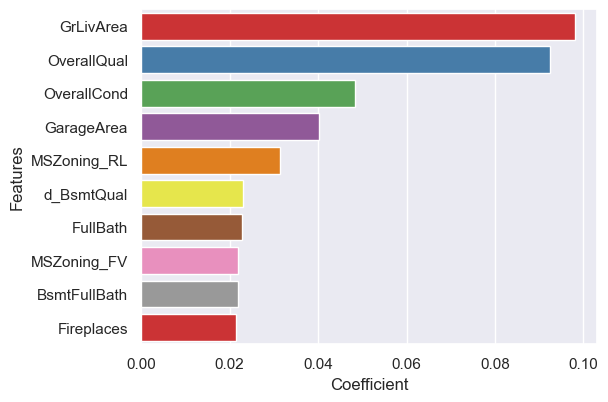

In [112]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price 
of a house.  

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 100
    - Lasso - 0.003
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.019689
    - Lasso - 0.019787

- The Mean Squared Error of Ridge is slightly lesser than that of Lasso
  
- Hence based on Ridge, the factors that generally affect the price are the Zoning classification, Living area
  square feet, Overall quality and condition of the house, Garage Area, d_bsmtqual and 1stFlrsf
    
Therefore, the variables predicted by Ridge in its bar chart as significant variables for predicting the 
price of a house.